# INTRODUCTION 

### Problem: Maternal Morbidity on the Rise

According to the University of Minnesota, "Maternal deaths in the first months of the COVID-19 pandemic increased 33%—and even higher in Black and Hispanic women..." 

CITATION: https://www.cidrap.umn.edu/news-perspective/2022/06/maternal-deaths-climbed-33-during-covid-19. 

Duke University recently published a paper estimating that a total ban on abortion would increase Maternal morbidity rates dramatically.

"...I find that in the first year of such a ban, estimated pregnancy-related deaths would increase from 675 to 724 (49 additional deaths, representing a 7% increase), and in subsequent years to 815 (140 additional deaths, for a 21% increase). Non-Hispanic Black people would experience the greatest increase in deaths (a 33% increase in subsequent years). Estimated pregnancy-related deaths would increase for all races and ethnicities examined." 

CITATION
https://read.dukeupress.edu/demography/article/58/6/2019/265968/The-Pregnancy-Related-Mortality-Impact-of-a-Total

Given the most recent overturning of Roe vs. Wade in the United States, it's crucial that medical research is performed with the goal of decreasing maternal morbidity. It's especially important that health care solutions for birthing parents be accessible and low cost. 

### Hypothetical Business Case: Maternal Morbidity Research 

NYU Langone in NYC is doing research on Machine Learning and it's applications in lethal fetal diagnoses. Early detection in these cases provide the best possible medical outcomes for birthing parents and provide the most choices on how the birthing parents would like to handle the diagnosis. 

### Proposed Solution: An Early Detection AI for Pathological Diagnoses

I've been hired by NYU Langone to do design a model. I've decided that this model will focus on having a high recall as it's primary metric. This is because the risk of a potentially lethal pregnancy going undetected would result in 1 and/or two deaths, and the risk of a false positive would result in further medical diagnostics. This model is designed to flag pathological diagnoses as early as possible, for a doctor to confirm the diagnosis. This model is NOT designed to replace the diagnostic capabilities of a doctor, but to save time and resources for birthing parents and hospitals. 

I'll be working with Cardiotocogram information specifically, and provide NYU Langone with my final result as proof of concept for further research. 

### Data Understanding

I'll be using Cardiotocogram information from CITATION: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification.

The original data is here: 
https://archive.ics.uci.edu/ml/datasets/cardiotocography

#### This data was published in 2000, by Marques de SÃ¡, J.P., Biomedical Engineering Institute, Porto, Portugal. Bernardes, J., Faculty of Medicine, University of Porto, Portugal. Ayres de Campos, D., Faculty of Medicine, University of Porto, Portugal.

This is an appropriate data source for this problem/solution because it has a mix of Cardiotocogram information that range from normal to suspected diagnosis to pathological diagnosis. 

LIMITATIONS: Pathological diagnosis in this data does not necessarily mean a lethal prenatal diagnosis, but that is the worst possible case that this data can represent. Therefore I'm going to be focusing on the "Pathological" class within this data, especially, and bear in mind that the more generalized and broad use cases for this model will be early detection of all pathological diagnoses, including lethal prenatal diagnosis.

CITATION: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

CITATION : Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

#### From Kaggle on the Size of the Data and Classes within:

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

Normal

Suspect

Pathological

#### From Kaggle on the more general use cases of this data: 

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

Data
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetricians into 3 classes:

- Normal

- Suspect

- Pathological

Further Reading: https://onlinelibrary.wiley.com/doi/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9

This is a paper by the original collectors of the data about their Machine Learning results. 

### Attribute Information:

LB - FHR baseline (beats per minute)

AC - # of accelerations per second

FM - # of fetal movements per second

UC - # of uterine contractions per second

DL - # of light decelerations per second

DS - # of severe decelerations per second

DP - # of prolongued decelerations per second

ASTV - percentage of time with abnormal short term variability

MSTV - mean value of short term variability

ALTV - percentage of time with abnormal long term variability

MLTV - mean value of long term variability

Width - width of FHR histogram

Min - minimum of FHR histogram

Max - Maximum of FHR histogram

Nmax - # of histogram peaks

Nzeros - # of histogram zeros

Mode - histogram mode

Mean - histogram mean

Median - histogram median

Variance - histogram variance

Tendency - histogram tendency

#### I'll be using all features in the initial modeling of the data, and be using SHAP with improved feature selection to make my final model. 

### IMPORTS 

In [76]:
# Importing the nessisary libraries

import pandas as pd
import numpy as np
from itertools import cycle
import shap
import pickle


from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import label_binarize, LabelBinarizer

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, precision_recall_curve, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, confusion_matrix

from sklearn import set_config
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set_style('white')

### FUNCTIONS

citation: https://stackoverflow.com/questions/68402691/adding-dropping-column-instance-into-a-pipeline

In [2]:
# creating a column transformer that only drops columns from a pipeline

In [3]:
class columnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self 

CITATION: https://stackoverflow.com/questions/46953967/multilabel-indicator-is-not-supported-for-confusion-matrix

In [4]:
# Creating an empty list called reports, and a function that will take a model,
# a y value and a set of predictions and evaluate how well the model's recall is

In [5]:
reports = []

In [6]:
def evaluate(model, y_val, y_preds):
    
    """
    DOCSTRING: 
    evaluate expects a model, a list of y_trues and associated list of 
    y_predicted. it outputs a confusion matrix of RECALL values (noramalize is
    set to true) and the associated precision, recall, f1 and support of the 
    PATHOLOGICAL class (raw_report[2])"""

    lables = ['Normal', 'Suspected', 'Pathological']    

    ax = plt.subplot()

    cm = confusion_matrix(np.asarray(y_val).argmax(axis=1), np.asarray(y_preds).argmax(axis=1), 
                          normalize = "true")
    
    sns.heatmap(cm, annot=True, fmt='.2%', ax=ax);  

    #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(lables); ax.yaxis.set_ticklabels(lables);\
    
    raw_report = metrics.classification_report(y_val, y_preds, output_dict = True)
    class_3_report = raw_report['2']
    
    reports.append(class_3_report)
    
    print('************************************************************')
    print(cm)
    print('METRICS FOR PATHOLOGICAL CLASS')
    print(class_3_report)

CITATION: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [7]:
# creating a function that takes a list of predictions, a list of true y values,
# and the name of the model and provides an ROC AUC plot with multiclass labels

In [8]:
def visualize_ROC_AUC(y_preds, y_val, model_name):
    
    """
    DOCSTRING: 
    visualize_ROC_AUC expects a list of predictions, a list of true y values, 
    and the name of the model. It will output a multiclass ROC AUC plot using
    the OneVsRest method, making a line for each class, and two dotted lines, 
    one for the micro_average (balenced for class imbalence), and macro_average
    (not balenced.)
    """

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_preds[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_preds.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f}%)".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f}%)".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    labels = {0 : "Normal", 1: "Suspect", 2: "Pathological"}
    
    
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=2,
            label=f"ROC curve of {labels[i]} (area = {round(roc_auc[i]*100)}%)"
        )

    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name}'s detection of different classes using 1 over all")
    plt.legend(loc="lower right")
    return plt.show()

In [9]:
# creating a function that will run evaluate and visualize together

In [10]:
def eval_and_vis(model, y_val, y_preds, model_name):
    evaluate(model, y_val, y_preds)
    visualize_ROC_AUC(y_preds, y_val, model_name)
    

In [11]:
# creating a function that will take model, X train, Y train and X test
# and will run evaluate and visualize on both the train and test sets

In [12]:
def show_train_and_test(grid, X_tr, y_tr, X_te, model_name):
    
    """
    DOCSTRING: 
    show_train_and_test expects a grid or model, X_train, y_train, X_test
    and the name of the model. It outputs a report with the confusion matrix
    and ROC AUC plot and other metrics for both the test and train set"""
    
    grid.fit(X_tr, y_tr)
    y_preds = grid.predict(X_tr)
    y_preds = lb.transform(y_preds)
    y_train_binarized = lb.transform(y_tr)
    print("TRAINING SET CONFUSION MATRIX AND ROC AUC MULTICLASS PLOT")
    eval_and_vis(grid, y_train_binarized, y_preds, 'model_name')
    
    
    y_preds = grid.predict(X_te)
    y_preds = lb.transform(y_preds)
    print("TEST SET CONFUSION MATRIX AND ROC AUC MULTICLASS PLOT")
    eval_and_vis(grid, y_val, y_preds, 'model_name')
    
    
    print("Best Parameters: \n{}\n".format(grid.best_params_))
    print('************************************************************')

In [13]:
# creating a function that takes a list of features and their impotances and 
# plots them

In [14]:
def visualize_importances(importances):
    columns = importances.columns
    counter = 0
    for index, number in enumerate(importances.columns, start=1):
        fig, ax = plt.subplots()
        ax = sns.barplot(data = importances, x = importances.index,
                         y = importances[number])
        ax.set_title(f'{title_labels[counter]}s as a class predictor')
        counter += 1

### Investigating the data

In [15]:
# loading the data 

In [16]:
df = pd.read_csv('fetal_health.csv')

In [17]:
# taking a look at the first five rows

In [18]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [19]:
# looking at the size of the data

In [20]:
df.shape

(2126, 22)

In [21]:
# all columns are continuous with no apparent missing values

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [23]:
# no missing values are present

In [24]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [25]:
# taking a look at the discriptive statistics

In [26]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


#### Observations:


Fetal Movement doesn't have a value until it's upper quartile ranges, similar to light decelerations. Severe decelerations looks to be a very sparse feature, as well as prolonged decelerations. 

In [27]:
# seperating the target from the rest of the data

In [28]:
X = df.drop(['fetal_health'],axis = 1)
y = df['fetal_health']

In [87]:
basic_labels = list(X.columns)

['Baseline Value',
 'Accelerations',
 'Fetal Movement',
 'Uterine Contractions',
 'Light Decelerations',
 'Severe Decelerations',
 'Prolongued Decelerations',
 'Abnormal Short Term Variability',
 'Mean Value Of Short Term Variability',
 'Percentage Of Time With Abnormal Long Term Variability',
 'Mean Value Of Long Term Variability',
 'Histogram Width',
 'Histogram Min',
 'Histogram Max',
 'Histogram Number Of Peaks',
 'Histogram Number Of Zeroes',
 'Histogram Mode',
 'Histogram Mean',
 'Histogram Median',
 'Histogram Variance',
 'Histogram Tendency']

In [31]:
# Making a list of features for graphs 

In [32]:
basic_labels = list(X.columns)
title_labels = [x.replace("_", " ").title() for x in basic_labels]
title_labels

['Baseline Value',
 'Accelerations',
 'Fetal Movement',
 'Uterine Contractions',
 'Light Decelerations',
 'Severe Decelerations',
 'Prolongued Decelerations',
 'Abnormal Short Term Variability',
 'Mean Value Of Short Term Variability',
 'Percentage Of Time With Abnormal Long Term Variability',
 'Mean Value Of Long Term Variability',
 'Histogram Width',
 'Histogram Min',
 'Histogram Max',
 'Histogram Number Of Peaks',
 'Histogram Number Of Zeroes',
 'Histogram Mode',
 'Histogram Mean',
 'Histogram Median',
 'Histogram Variance',
 'Histogram Tendency']

In [35]:
# making a dictionary to transform the column names of X

In [36]:
transform_labels = dict(zip(basic_labels, title_labels))
transform_labels

{'baseline value': 'Baseline Value',
 'accelerations': 'Accelerations',
 'fetal_movement': 'Fetal Movement',
 'uterine_contractions': 'Uterine Contractions',
 'light_decelerations': 'Light Decelerations',
 'severe_decelerations': 'Severe Decelerations',
 'prolongued_decelerations': 'Prolongued Decelerations',
 'abnormal_short_term_variability': 'Abnormal Short Term Variability',
 'mean_value_of_short_term_variability': 'Mean Value Of Short Term Variability',
 'percentage_of_time_with_abnormal_long_term_variability': 'Percentage Of Time With Abnormal Long Term Variability',
 'mean_value_of_long_term_variability': 'Mean Value Of Long Term Variability',
 'histogram_width': 'Histogram Width',
 'histogram_min': 'Histogram Min',
 'histogram_max': 'Histogram Max',
 'histogram_number_of_peaks': 'Histogram Number Of Peaks',
 'histogram_number_of_zeroes': 'Histogram Number Of Zeroes',
 'histogram_mode': 'Histogram Mode',
 'histogram_mean': 'Histogram Mean',
 'histogram_median': 'Histogram Median

In [37]:
# cleaning up X 

In [38]:
X = X.rename(mapper = transform_labels, axis = 1)

In [29]:
# taking a look at the class imbalence and saving the ratio

In [30]:
y_distribution = y.value_counts()
y_distribution

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [41]:
# visualizing the class imbalence 

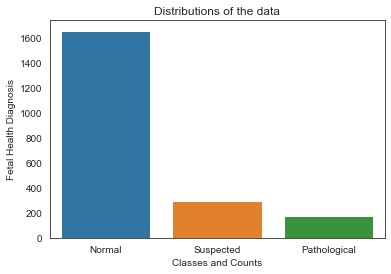

In [39]:
fig, ax = plt.subplots()
distributions = sns.barplot(x = y_distribution, 
                            y = y_distribution.index, 
                            data = y_distribution,
                           order = y_distribution)
distributions.set_title("Distributions of the data")
distributions.set_xlabel("Classes and Counts")
plt.xticks(ticks = [0, 1, 2], labels = ["Normal", "Suspected", "Pathological"])
plt.ylabel("Fetal Health Diagnosis");

In [ ]:
# exploring the ratios of the class imbalence and saving those as weights 
# to try as params on models

In [40]:
y_dict = dict(y.value_counts(normalize = True))
y_dict

y_weights = {}
for key, value in y_dict.items():
    y_weights[key] = 1 - value
    
y_weights

{1.0: 0.22154280338664156, 2.0: 0.861241768579492, 3.0: 0.9172154280338665}

Observations: there is a heavy class imbalance that must be accounted for in modeling. 

In [ ]:
# investigating the columns, aggrigated by the target

In [42]:
mean_agg = df.groupby(by = df['fetal_health']).mean()
mean_agg

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
fetal_health,,,,,,,,,,,,,,,,,,,,,
1.0,131.981873,0.003992,0.007963,0.004781,0.001941,6.042296e-07,0.000051,42.465861,1.430634,5.044713,...,73.400000,91.085801,164.485801,4.163142,0.335347,138.258610,135.102115,138.459819,17.479758,0.341994
2.0,141.684746,0.000275,0.008332,0.002390,0.000536,0.000000e+00,0.000095,61.901695,0.638983,29.030508,...,49.159322,113.294915,162.454237,3.311864,0.244068,146.555932,144.759322,147.071186,7.213559,0.433898
3.0,131.687500,0.000392,0.025676,0.003784,0.003670,3.409091e-05,0.001273,64.539773,1.575568,22.846591,...,78.346591,83.982955,162.329545,4.443182,0.346591,114.607955,112.977273,119.562500,50.732955,-0.073864


### Investigating the Attributes's Relationship with the Target 

CITATION: https://www.kaggle.com/code/casper6290/fetalhealthclassification-99

In [43]:
# making a plot to look at the classes by feature

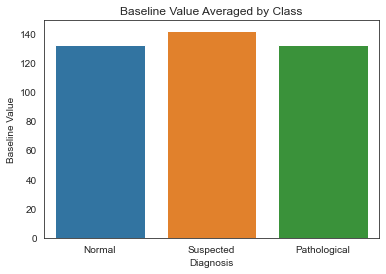

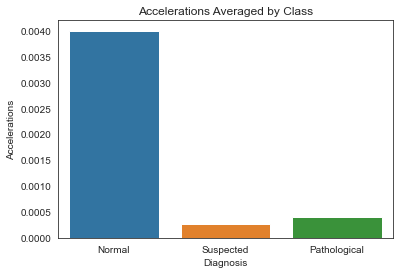

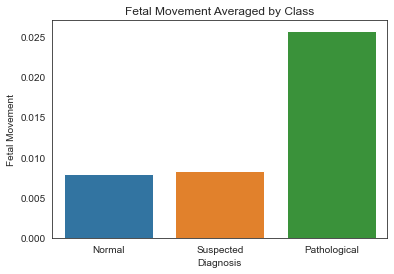

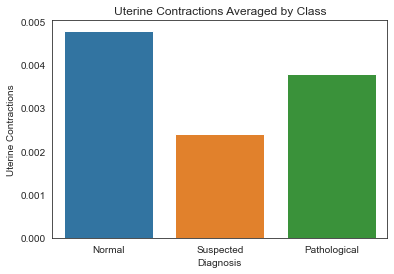

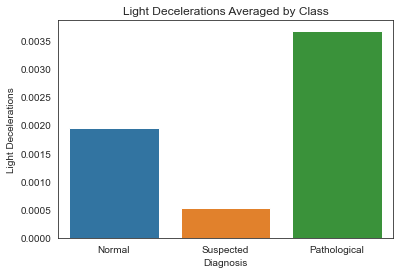

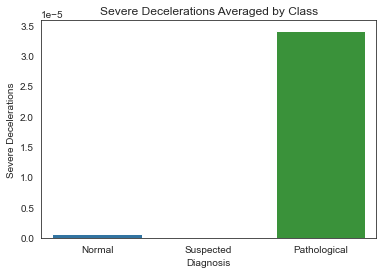

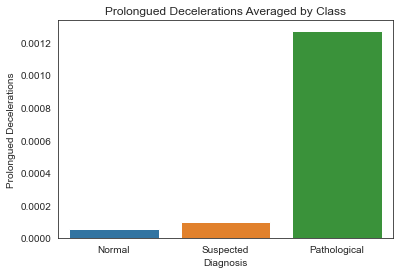

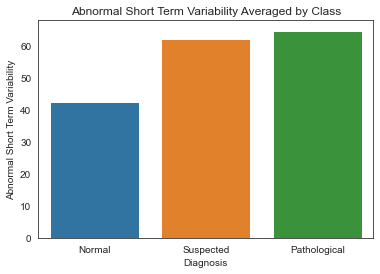

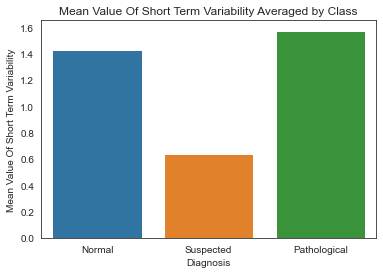

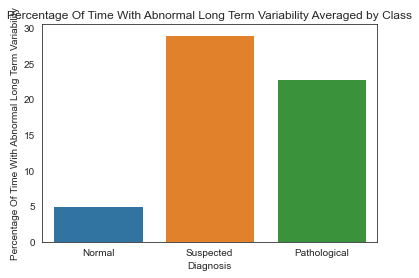

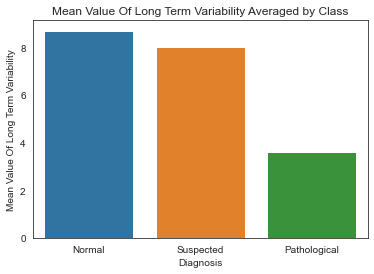

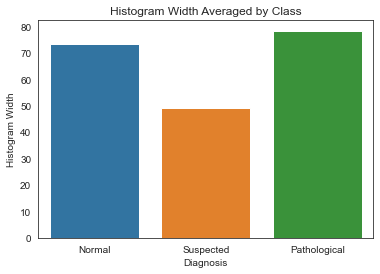

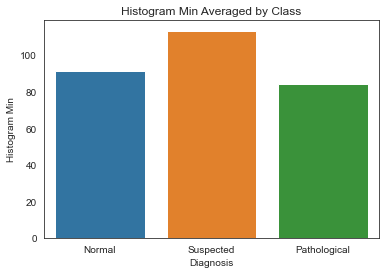

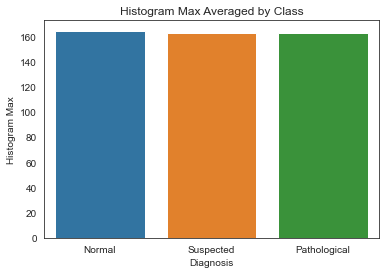

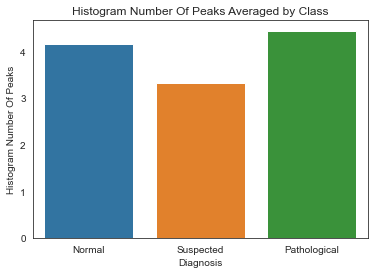

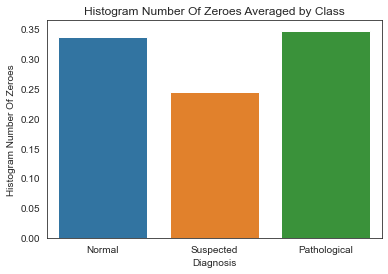

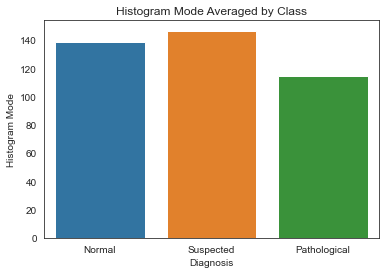

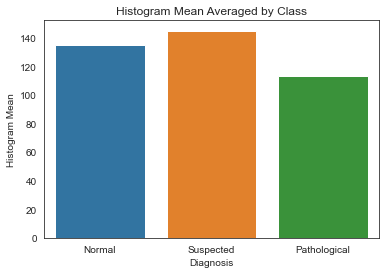

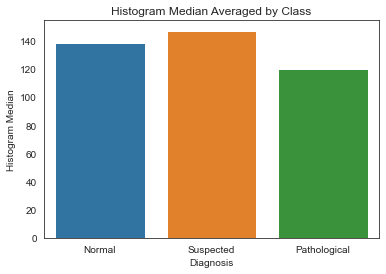

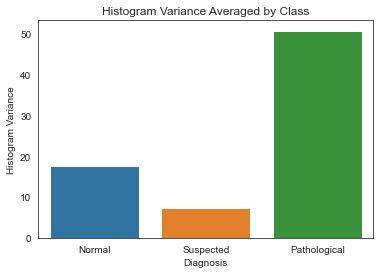

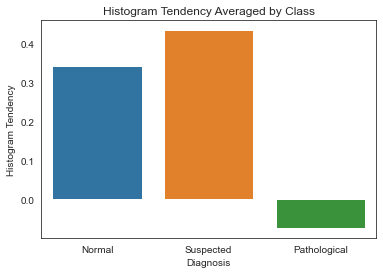

In [44]:
counter = 0
for index, col in enumerate(mean_agg.columns,start=1):
    fig, ax = plt.subplots()
    figure = sns.barplot(data = mean_agg,
                         x = mean_agg.index,
                         y = mean_agg[col])
    
    figure.set_title(f"{title_labels[counter]} Averaged by Class")
    figure.set_xlabel("Diagnosis")
    figure.set_ylabel(f"{title_labels[counter]}")
    plt.xticks(ticks = [0, 1, 2], labels = ["Normal", "Suspected", "Pathological"])
    counter += 1

#### Observations and Implications: 

- ##### Baseline Values
is pretty equally distributed throughout all three classes.


- ##### Accelerations
were pretty equal between suspected and pathological, but ranged much much higher in the normal class. Further investigation upon this attribute is justified, as it may be important for ruling out the pathological diagnosis.


- ##### Fetal Movement
is roughly equal between normal and suspected classes but much higher with pathological cases, further investigation upon this attribute is justified, as it may be highly correlated with the pathological class. 


- ##### Uterine Contractions
is an interesting attribute as it's highest value is in the normal class, but it's second highest value is in the pathological class, followed by the suspected class. This implies that the model may find this feature confusing for distinguishing normal from pathological classes. 

- ##### Light Decelerations
is another interesting attribute as it's highest value is the pathological class, followed by the normal class at about half as high, followed by the suspected class at about 1/3rd as high as the normal class. This is a feature that could be fantastic at picking out a suspected diagnosis, but is of less interest to my pathological focused business case. 

- ##### Severe Decelerations
looks to be an important attribute for selecting pathological diagnoses, as it's almost exclusively present in the pathological class, and almost not found in any other class. 

- ##### Prolonged Decelerations
looks to be an important indicator for similar reasons, however it is somewhat more present equally between normal and suspected classes, it looks to be about eight times as high in pathological cases. 

- ##### Abnormal Short Term Variability
has implications of being somewhat useful in ruling out a case as normal, as it's about a third less high in normal cases as it is among suspected and pathological cases. 

- ##### Mean Value of Short Term Variability 
is an interesting attribute as it's highest in the pathological class, but nearly as high in the normal class, and about half as high in the suspected class. It would be useful in distinguishing the suspected class from the other two classes. 

- ##### Percentage of Time with Abnormal Short Term Variability
is highest in the suspected class and about a 1/5th less high in the pathological class. Compared to the normal class, both the suspected and pathological classes are much higher in this attribute. Therefore this attribute is probably best at ruling out cases as normal for our purposes. 

- ##### Mean value of Long Term Variability 
is about halved in the pathological class as it is in the suspected and normal classes, making implying it may be useful in distinguishing pathological cases from the other two classes. 

- ##### Histogram Width 
is about equal between the pathological class and the normal class, but about half as high in the suspected class. This implies this attribute would be good at distinguishing suspected cases from the normal and pathological classes. 

- ##### Histogram Min 
is highest in suspected cases, and only slightly higher than it is in pathological and normal cases. This implies this feature may not be very useful to our model, but may give slight advantage if our goal was to pick a suspected case out between both pathological and normal cases.

- ##### Histogram Max 
is about equal between all three classes, implying that this feature may not be very significant to any of the classes. 

- ##### Histogram Number of Peaks
is highest in the pathological class, but almost equal with the normal class. However, it's about 1 less on average from the pathological class, implying it may have some significants in ruling out suspected for our purposes. 

- ##### Histogram Number of Zeros
follows a very similar pattern. 

- ##### Histogram Mode
is about 20 less in the pathological class than it is in the other two classes, implying that it may be useful for our purposes of isolating pathological cases. 

- ##### Histogram Mean and Histogram Median
follow a similar pattern but all three classes have a bit less distinction between them in these attributes. 

- ##### Histogram Variance
more than three as high as the normal class, which is about three times as high as the suspected class, implying this attribute will be very useful for isolating pathological cases, and making each class distinct to the model. 

- ##### Histogram Tendency 
looks to be a very important attribute to our model, as in the pathological class, this value averages a negative value, as opposed to the two other classes where the values are positive and the absolute values are much higher. This attribute looks to be encoded by the data collectors, and I'd like to know much more about what these values mean to a non-technical audience. In my business case, I'd want to communicate with the data collection team about this attribute. 

In [45]:
# splitting X train and X test data 

In [46]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, random_state=42, test_size = .1)

In [47]:
# making a small holdout set 

In [48]:
X_train,  X_val , y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [49]:
# looking at the distributions of all features in X Train

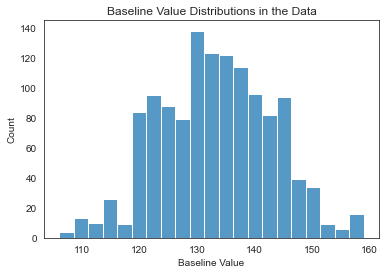

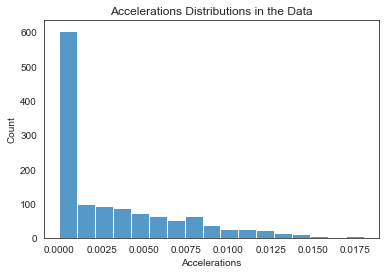

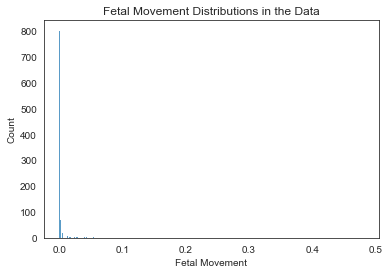

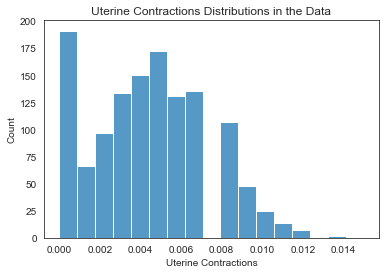

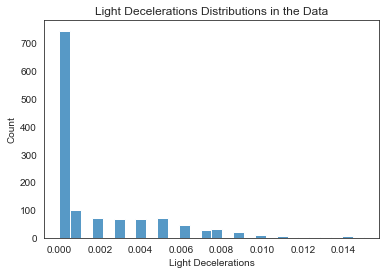

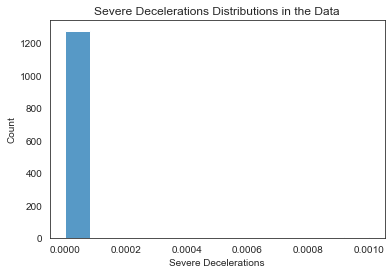

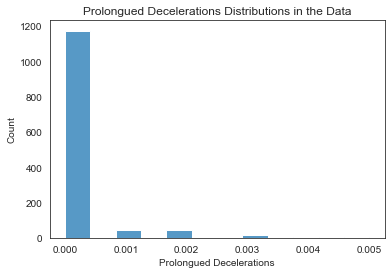

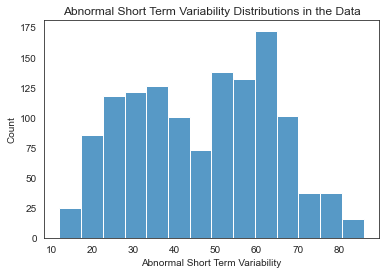

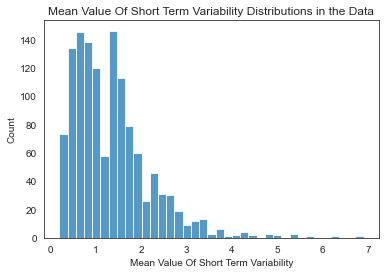

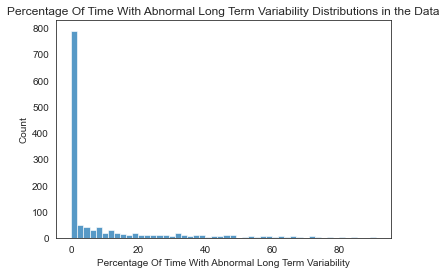

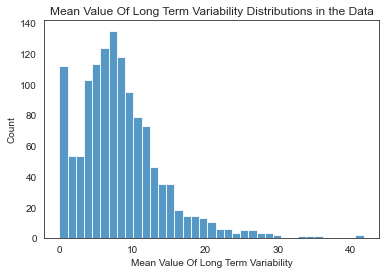

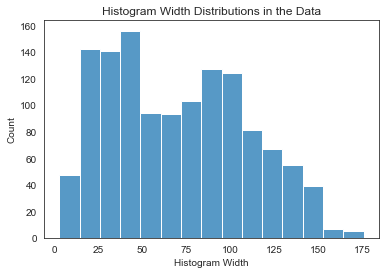

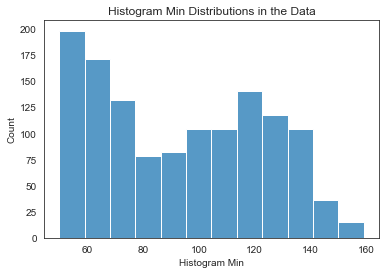

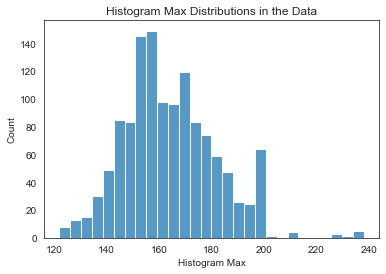

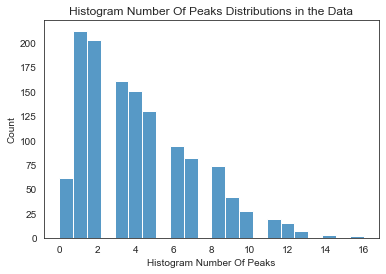

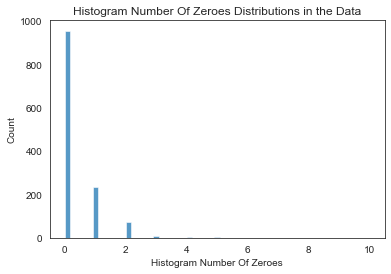

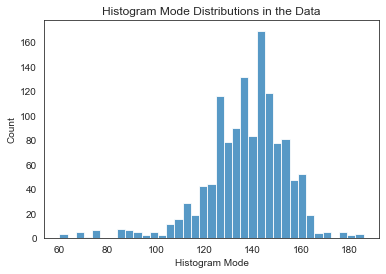

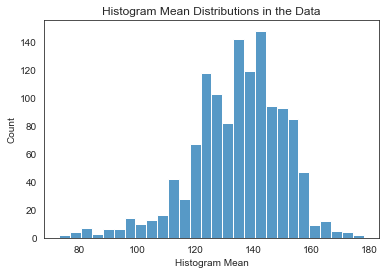

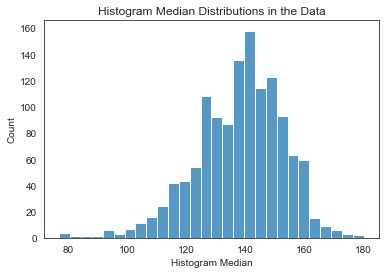

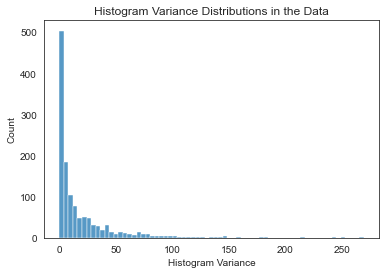

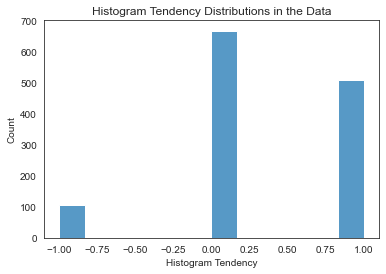

In [50]:
counter = 0

for col in X_train:
    fig, ax = plt.subplots()
    distributions = sns.histplot(data = X_train, x = col)
    distributions.set_title(f'{title_labels[counter]} Distributions in the Data')
    distributions.set_xlabel(f'{title_labels[counter]}')
    counter += 1;

In [51]:
# OHE y using Label Binarizer (this is so my ROC AUC plots will work)

In [54]:
lb = LabelBinarizer()

y_train_binarized = lb.fit_transform(y_train)
y_train_binarized

n_classes = 3

#### Correlation to the target class:

In [56]:
# making a df to plot the correlations to the target

In [57]:
y_train_target_pathological = [x[2] for x in y_train_binarized]

correlation_df = X_train.copy()
correlation_df["Pathological"] = y_train_target_pathological

correlation_df.head()

,Baseline Value,Accelerations,Fetal Movement,Uterine Contractions,Light Decelerations,Severe Decelerations,Prolongued Decelerations,Abnormal Short Term Variability,Mean Value Of Short Term Variability,Percentage Of Time With Abnormal Long Term Variability,...,Histogram Min,Histogram Max,Histogram Number Of Peaks,Histogram Number Of Zeroes,Histogram Mode,Histogram Mean,Histogram Median,Histogram Variance,Histogram Tendency,Pathological
125,159.0,0.000,0.0,0.003,0.0,0.0,0.000,65.0,0.4,16.0,...,81.0,172.0,0.0,0.0,163.0,163.0,165.0,2.0,1.0,0
922,122.0,0.002,0.0,0.002,0.0,0.0,0.001,31.0,1.2,1.0,...,87.0,147.0,2.0,1.0,120.0,119.0,123.0,9.0,0.0,0
1390,142.0,0.000,0.0,0.007,0.0,0.0,0.000,60.0,0.4,8.0,...,136.0,156.0,0.0,0.0,147.0,146.0,148.0,1.0,0.0,0
1446,147.0,0.003,0.0,0.004,0.0,0.0,0.000,46.0,0.7,46.0,...,144.0,173.0,2.0,0.0,157.0,157.0,159.0,1.0,0.0,0
1032,136.0,0.013,0.0,0.005,0.0,0.0,0.000,22.0,2.3,0.0,...,114.0,178.0,3.0,1.0,145.0,144.0,145.0,6.0,0.0,0


In [ ]:
# making a heat map between the features of X train and the target variable

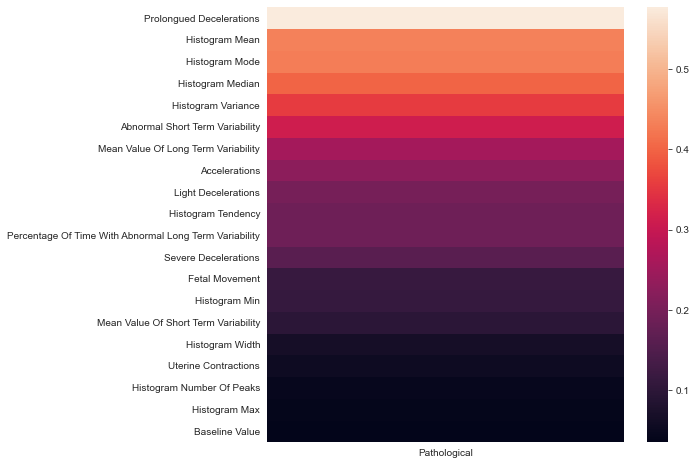

In [58]:
target_correlation = abs(correlation_df.corr())[['Pathological']].sort_values(by = "Pathological")
target_correlation = target_correlation[1:-1]

plt.figure(figsize = (8, 8))
target_correlation_plot = sns.heatmap(data = target_correlation)
target_correlation_plot.invert_yaxis()

In [67]:
# Plotting those correlations on a bar chat

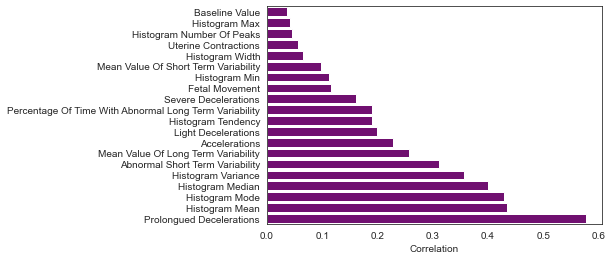

In [69]:
fig, ax = plt.subplots()

target_correlation_bar_plot = sns.barplot(data = target_correlation, 
                                          x = target_correlation.values.flatten(),
                                          y = target_correlation.index, 
                                         color = "purple")

target_correlation_bar_plot.set_xlabel("Correlation");

In [70]:
# this is a good hypothosis for what the feature importances will be

## Data Prep: 

Due to this data being remarkably clean, (there are no missing or NAN values, I won't be doing much to the data in prep for modeling. In certain models I'll be scaling the data, but that will happen on a case by case basis as it's not always appropriate for each kind of model. 

# MODELING

In [ ]:
# setting my display to output a diagram

In [71]:
set_config(display = 'diagram')

In [ ]:
# transforming y_val for my confusion matrixes and ROC plots

In [72]:
y_val = lb.transform(y_val)

## Logistic Regression

### Logistic Regression Baseline

In [74]:
lg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lg', LogisticRegression()),
    
])
baseline_params = {'lg__random_state' : [42]}

grid = GridSearchCV(lg_pipeline, baseline_params, scoring = 'recall_micro')

TRAINING SET CONFUSION MATRIX AND ROC AUC MULTICLASS PLOT
************************************************************
[[0.96203796 0.03496503 0.002997  ]
 [0.26744186 0.68023256 0.05232558]
 [0.06481481 0.13888889 0.7962963 ]]
METRICS FOR PATHOLOGICAL CLASS
{'precision': 0.8775510204081632, 'recall': 0.7962962962962963, 'f1-score': 0.8349514563106796, 'support': 108}


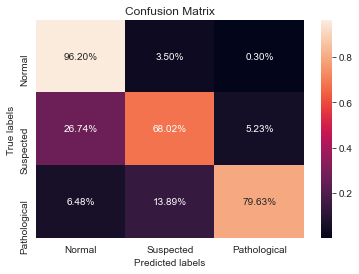

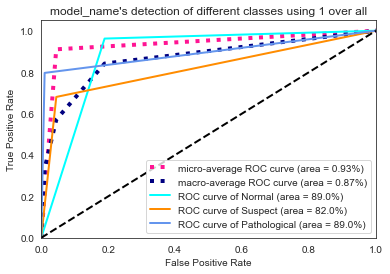

TEST SET CONFUSION MATRIX AND ROC AUC MULTICLASS PLOT
************************************************************
[[0.93737374 0.05656566 0.00606061]
 [0.27586207 0.64367816 0.08045977]
 [0.04       0.12       0.84      ]]
METRICS FOR PATHOLOGICAL CLASS
{'precision': 0.8076923076923077, 'recall': 0.84, 'f1-score': 0.8235294117647058, 'support': 50}


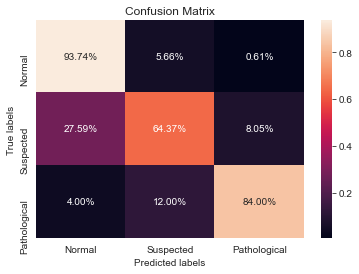

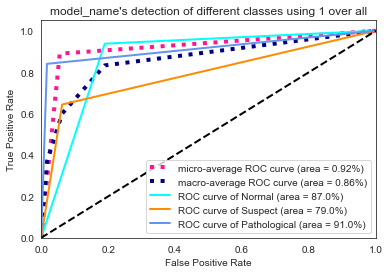

Best Parameters: 
{'lg__random_state': 42}

************************************************************


In [77]:
show_train_and_test(grid, X_train, y_train, X_val, 'model_name')

### Logistic Regression Gridsearch

In [78]:
# now trying a gridsearch to tune the model further

In [79]:
lg_gscv_params = {
    'lg__C': [0.01, 1, 10, 100],
    'lg__penalty' : ['l1', 'l2', 'elasticnet'],
    'lg__solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'lg__class_weight': [y_weights, 'balanced'],
    'lg__multi_class' : ['auto', 'ovr', 'multinomial']}

In [80]:
grid = GridSearchCV(lg_pipeline, lg_gscv_params, scoring = 'recall_micro')

TRAINING SET CONFUSION MATRIX AND ROC AUC MULTICLASS PLOT
************************************************************
[[0.94305694 0.04995005 0.00699301]
 [0.15116279 0.80232558 0.04651163]
 [0.03703704 0.13888889 0.82407407]]
METRICS FOR PATHOLOGICAL CLASS
{'precision': 0.8557692307692307, 'recall': 0.8240740740740741, 'f1-score': 0.839622641509434, 'support': 108}


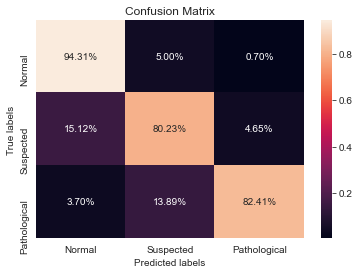

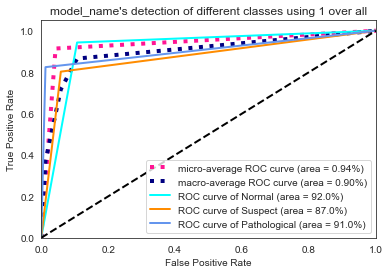

TEST SET CONFUSION MATRIX AND ROC AUC MULTICLASS PLOT
************************************************************
[[0.90505051 0.07878788 0.01616162]
 [0.16091954 0.79310345 0.04597701]
 [0.02       0.16       0.82      ]]
METRICS FOR PATHOLOGICAL CLASS
{'precision': 0.7735849056603774, 'recall': 0.82, 'f1-score': 0.796116504854369, 'support': 50}


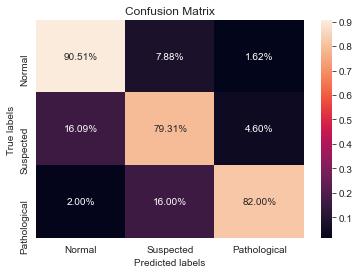

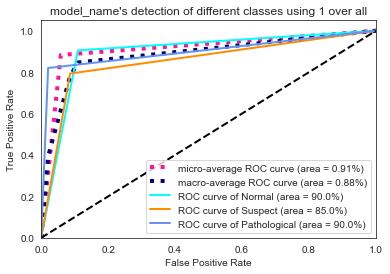

Best Parameters: 
{'lg__C': 1, 'lg__class_weight': {1.0: 0.22154280338664156, 2.0: 0.861241768579492, 3.0: 0.9172154280338665}, 'lg__multi_class': 'auto', 'lg__penalty': 'l2', 'lg__solver': 'liblinear'}

************************************************************


In [81]:
show_train_and_test(grid, X_train, y_train, X_val, 'model_name')

#### Observations: 
This model doesn't seem to be overfit. It performs better on the Suspected class than the model before grid searching. 

## OneVsRest Logistic Regression

### OneVsRest Logistic Regression Baseline

In [82]:
# Making a baseline OneOverAll Logistic Resgression Model

In [83]:
OVR_lg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('OVR_lg', OneVsRestClassifier(LogisticRegression())),
    
])
baseline_params = {}

grid = GridSearchCV(OVR_lg_pipeline, baseline_params, scoring = 'recall_micro')

TRAINING SET CONFUSION MATRIX AND ROC AUC MULTICLASS PLOT
************************************************************
[[0.97002997 0.02797203 0.001998  ]
 [0.30813953 0.64534884 0.04651163]
 [0.07407407 0.13888889 0.78703704]]
METRICS FOR PATHOLOGICAL CLASS
{'precision': 0.8947368421052632, 'recall': 0.7870370370370371, 'f1-score': 0.8374384236453202, 'support': 108}


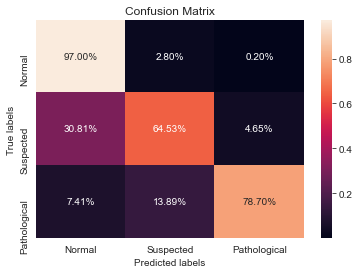

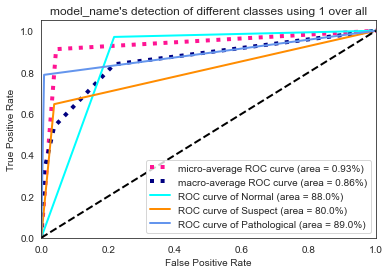

TEST SET CONFUSION MATRIX AND ROC AUC MULTICLASS PLOT
************************************************************
[[0.94343434 0.05050505 0.00606061]
 [0.28735632 0.67816092 0.03448276]
 [0.06       0.16       0.78      ]]
METRICS FOR PATHOLOGICAL CLASS
{'precision': 0.8666666666666667, 'recall': 0.78, 'f1-score': 0.8210526315789474, 'support': 50}


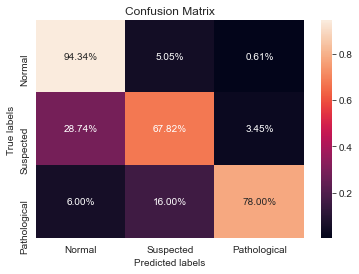

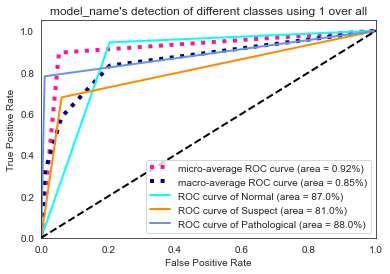

Best Parameters: 
{}

************************************************************


In [84]:
show_train_and_test(grid, X_train, y_train, X_val, 'model_name')

### OneVsRest Logistic Resgression Gridsearch

In [85]:
OVR_lg_gscv_params = {
    'OVR_lg__estimator__C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'OVR_lg__estimator__penalty' : ['l1', 'l2', 'elasticnet'],
    'OVR_lg__estimator__solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'OVR_lg__estimator__class_weight': [y_weights, 'balanced'],
    'OVR_lg__estimator__multi_class' : ['auto', 'multinomial']}

In [86]:
grid = GridSearchCV(OVR_lg_pipeline, OVR_lg_gscv_params, scoring = 'recall_micro')

TRAINING SET CONFUSION MATRIX AND ROC AUC MULTICLASS PLOT
************************************************************
[[0.88411588 0.0959041  0.01998002]
 [0.04651163 0.87790698 0.0755814 ]
 [0.01851852 0.13888889 0.84259259]]
METRICS FOR PATHOLOGICAL CLASS
{'precision': 0.7338709677419355, 'recall': 0.8425925925925926, 'f1-score': 0.7844827586206897, 'support': 108}


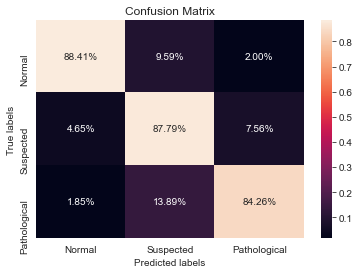

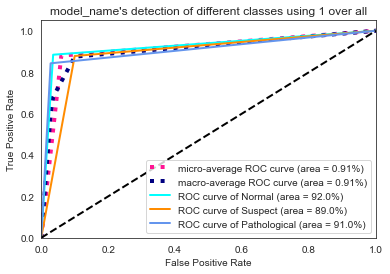

TEST SET CONFUSION MATRIX AND ROC AUC MULTICLASS PLOT
************************************************************
[[0.86464646 0.11717172 0.01818182]
 [0.03448276 0.87356322 0.09195402]
 [0.         0.14       0.86      ]]
METRICS FOR PATHOLOGICAL CLASS
{'precision': 0.7166666666666667, 'recall': 0.86, 'f1-score': 0.7818181818181817, 'support': 50}


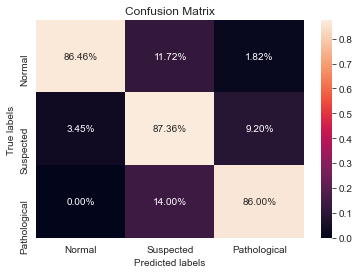

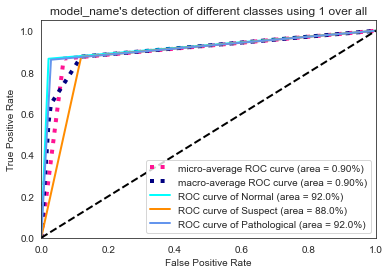

Best Parameters: 
{'OVR_lg__estimator__C': 2, 'OVR_lg__estimator__class_weight': 'balanced', 'OVR_lg__estimator__multi_class': 'multinomial', 'OVR_lg__estimator__penalty': 'l1', 'OVR_lg__estimator__solver': 'saga'}

************************************************************


In [87]:
show_train_and_test(grid, X_train, y_train, X_val, 'model_name')

####  Observations: 
This model doesn't seem to be over fit. It performs better once it's done it's gridsearch for the best hyper-parameters. 

## K Nearest Neighbors

### KNN Baseline 

In [91]:
KNN_pipeline = Pipeline([
    ('KNN', KNeighborsClassifier())
    
])
baseline_params = {}

grid = GridSearchCV(KNN_pipeline, baseline_params, scoring = 'recall_micro')

TRAINING SET CONFUSION MATRIX AND ROC AUC MULTICLASS PLOT
************************************************************
[[0.97602398 0.01898102 0.004995  ]
 [0.34302326 0.64534884 0.01162791]
 [0.10185185 0.08333333 0.81481481]]
METRICS FOR PATHOLOGICAL CLASS
{'precision': 0.9263157894736842, 'recall': 0.8148148148148148, 'f1-score': 0.8669950738916257, 'support': 108}


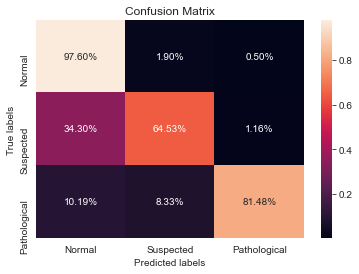

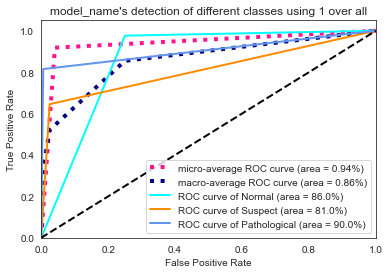

TEST SET CONFUSION MATRIX AND ROC AUC MULTICLASS PLOT
************************************************************
[[0.95959596 0.03434343 0.00606061]
 [0.36781609 0.5862069  0.04597701]
 [0.14       0.1        0.76      ]]
METRICS FOR PATHOLOGICAL CLASS
{'precision': 0.8444444444444444, 'recall': 0.76, 'f1-score': 0.8, 'support': 50}


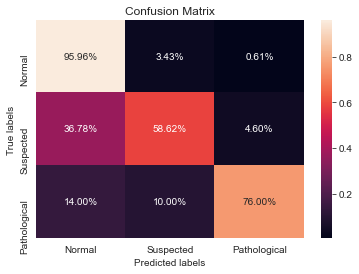

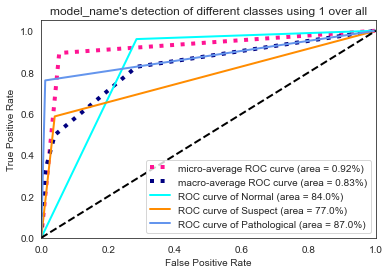

Best Parameters: 
{}

************************************************************


In [92]:
show_train_and_test(grid, X_train, y_train, X_val, 'model_name')

### KNN Gridsearch

In [93]:
KNN_gscv_params = {
    'KNN__n_neighbors': list(range(1, 26, 2)),
    'KNN__metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'KNN__p' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'KNN__weights' : ['uniform', 'distance']}

grid = GridSearchCV(KNN_pipeline, KNN_gscv_params, scoring = 'recall_micro')

TRAINING SET CONFUSION MATRIX AND ROC AUC MULTICLASS PLOT
************************************************************
[[1.         0.         0.        ]
 [0.01162791 0.98837209 0.        ]
 [0.         0.         1.        ]]
METRICS FOR PATHOLOGICAL CLASS
{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 108}


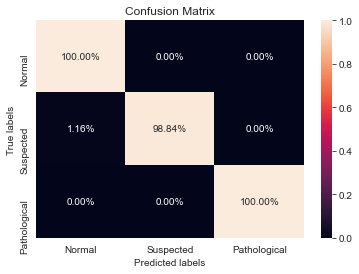

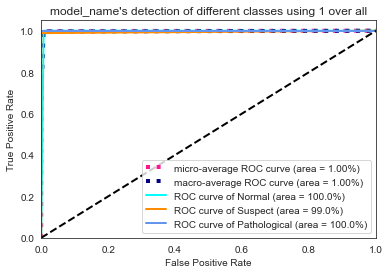

TEST SET CONFUSION MATRIX AND ROC AUC MULTICLASS PLOT
************************************************************
[[0.97171717 0.02424242 0.0040404 ]
 [0.35632184 0.59770115 0.04597701]
 [0.06       0.12       0.82      ]]
METRICS FOR PATHOLOGICAL CLASS
{'precision': 0.8723404255319149, 'recall': 0.82, 'f1-score': 0.8453608247422681, 'support': 50}


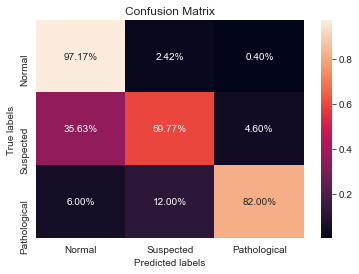

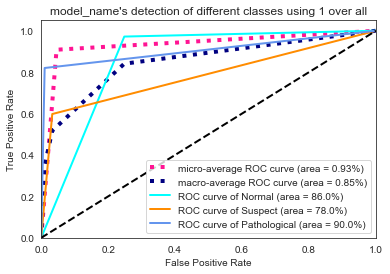

Best Parameters: 
{'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3, 'KNN__p': 0.001, 'KNN__weights': 'distance'}

************************************************************


In [94]:
show_train_and_test(grid, X_train, y_train, X_val, 'model_name')

#### Observations: 
This model looks to be very overfit. In future work, I'd like to come back and 
better tune the hyper parameters to see if I couldn't get a model that generalizes much better.

## OneVsRest KNN 

### OneVsRest KNN Baseline

In [95]:
OVR_KNN_pipeline = Pipeline([
    ('OVR_KNN', OneVsRestClassifier(KNeighborsClassifier())),
    
])
baseline_params = {}

grid = GridSearchCV(OVR_KNN_pipeline, baseline_params, scoring = 'recall_micro')

TRAINING SET CONFUSION MATRIX AND ROC AUC MULTICLASS PLOT
************************************************************
[[0.97202797 0.02097902 0.00699301]
 [0.31395349 0.65697674 0.02906977]
 [0.08333333 0.07407407 0.84259259]]
METRICS FOR PATHOLOGICAL CLASS
{'precision': 0.883495145631068, 'recall': 0.8425925925925926, 'f1-score': 0.8625592417061612, 'support': 108}


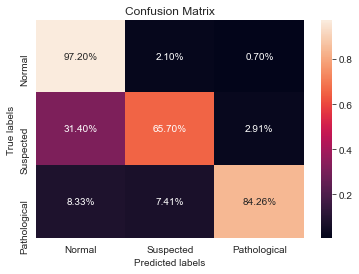

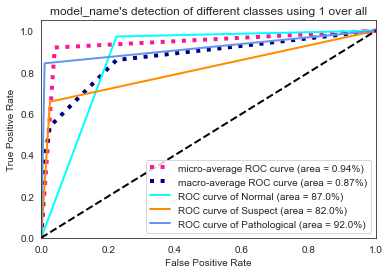

TEST SET CONFUSION MATRIX AND ROC AUC MULTICLASS PLOT
************************************************************
[[0.95959596 0.03232323 0.00808081]
 [0.35632184 0.5862069  0.05747126]
 [0.12       0.08       0.8       ]]
METRICS FOR PATHOLOGICAL CLASS
{'precision': 0.8163265306122449, 'recall': 0.8, 'f1-score': 0.8080808080808082, 'support': 50}


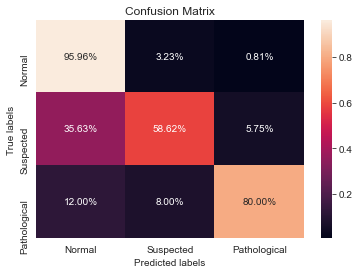

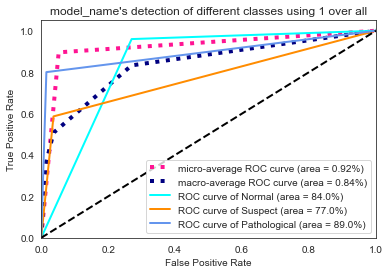

Best Parameters: 
{}

************************************************************


In [96]:
show_train_and_test(grid, X_train, y_train, X_val, 'model_name')

### OneVsRest KNN Gridsearch

In [97]:
OVR_KNN_params = {
    'OVR_KNN__estimator__n_neighbors': list(range(1, 26, 2)),
    'OVR_KNN__estimator__metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'OVR_KNN__estimator__weights' : ['uniform', 'distance']}

grid = GridSearchCV(OVR_KNN_pipeline, OVR_KNN_params, scoring = 'recall_micro')

In [98]:
grid = GridSearchCV(OVR_KNN_pipeline, OVR_KNN_params, scoring = 'recall_micro')

TRAINING SET CONFUSION MATRIX AND ROC AUC MULTICLASS PLOT
************************************************************
[[0.998002 0.001998 0.      ]
 [0.       1.       0.      ]
 [0.       0.       1.      ]]
METRICS FOR PATHOLOGICAL CLASS
{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 108}


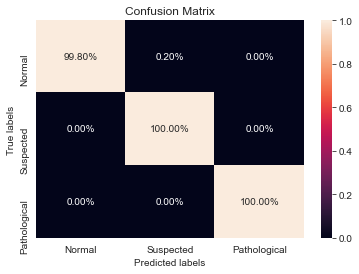

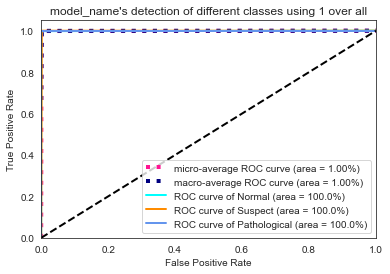

TEST SET CONFUSION MATRIX AND ROC AUC MULTICLASS PLOT
************************************************************
[[0.97171717 0.02424242 0.0040404 ]
 [0.35632184 0.59770115 0.04597701]
 [0.06       0.12       0.82      ]]
METRICS FOR PATHOLOGICAL CLASS
{'precision': 0.8723404255319149, 'recall': 0.82, 'f1-score': 0.8453608247422681, 'support': 50}


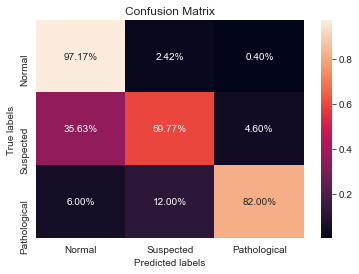

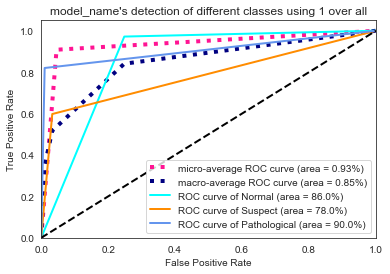

Best Parameters: 
{'OVR_KNN__estimator__metric': 'manhattan', 'OVR_KNN__estimator__n_neighbors': 3, 'OVR_KNN__estimator__weights': 'distance'}

************************************************************


In [99]:
show_train_and_test(grid, X_train, y_train, X_val, 'model_name')

#### Observations:
This model looks to be very overfit. In future work, I'd like to come back and better tune the hyper parameters to see if I couldn't get a model that generalizes much better.

## Support Vector Machine

### Support Vector Machine Baseline

In [ ]:
SVC_pipeline = Pipeline([
    ('SVC', svm.SVC())
    
])
baseline_params = {'SVC__random_state' : [42]}

grid = GridSearchCV(SVC_pipeline, baseline_params, scoring = 'recall_micro')

In [ ]:
show_train_and_test(grid, X_train, y_train, X_val, 'model_name')

In [ ]:
SVC_gscv_params = {
    'SVC__C': [ 3450, 3500, 3550, 3600],
    'SVC__kernel' : ['poly',],
                     #'linear', 'rbf',],
    'SVC__class_weight': [y_weights, 'balanced']}

grid = GridSearchCV(SVC_pipeline, SVC_gscv_params, scoring = 'recall_micro')

In [ ]:
show_train_and_test(grid, X_train, y_train, X_val, 'model_name')

One Over Rest SVC

In [ ]:
OVR_SVC_pipeline = Pipeline([
    ('OVR_SVC', OneVsRestClassifier(svm.SVC(random_state = 42))),
    
])
baseline_params = {}

grid = GridSearchCV(OVR_SVC_pipeline, baseline_params, scoring = 'recall_micro')

In [ ]:
show_train_and_test(grid, X_train, y_train, X_val, 'model_name')

improving with gridsearch

In [ ]:
OVR_SVM_gscv_params = {
    'OVR_SVC__estimator__C': [3000, 3250, 3500, 3750, 4000,],
    'OVR_SVC__estimator__kernel': ['poly',],
                                  # 'linear', 'rbf',],
    'OVR_SVC__estimator__class_weight': [y_weights, 'balanced']}

grid = GridSearchCV(OVR_SVC_pipeline, param_grid = OVR_SVM_gscv_params, 
                          scoring = 'recall_micro')

In [ ]:
show_train_and_test(grid, X_train, y_train, X_val, 'model_name')

# Random Forest:

In [ ]:
rf_pipeline = Pipeline([
    ('rf', RandomForestClassifier())
    
])
baseline_params = {'rf__random_state' : [42]}

grid = GridSearchCV(rf_pipeline, baseline_params, scoring = 'recall_micro')

In [ ]:
show_train_and_test(grid, X_train, y_train, X_val, 'model_name')

In [ ]:
rf_gscv_params = {
    'rf__min_samples_split': [4, 5, 6, 7, 8, 9, 10],
    'rf__min_samples_leaf' : [1, 2, 3, 4, 5, 6],
    'rf__max_features' : ['auto', 'sqrt', 'log2'],
    #'max_leaf_nodes': [40, 50, 60, 70, None],
    'rf__criterion': ["gini", "entropy"],
    'rf__class_weight': ['balanced', y_weights]}

grid = GridSearchCV(rf_pipeline, rf_gscv_params, scoring = 'recall_micro')

In [ ]:
show_train_and_test(grid, X_train, y_train, X_val, 'model_name')

# Random Forest Feature Importance

In [ ]:
rf_best_params = {'class_weight': {1.0: 0.22154280338664156, 
                                       2.0: 0.861241768579492, 
                                       3.0: 0.9172154280338665},
                  'criterion': 'gini',
                  'max_features': 'auto',
                  'min_samples_leaf': 2,
                  'min_samples_split': 4}

In [ ]:
# best_rf = RandomForestClassifier(**rf_best_params)

In [ ]:
best_rf = rf_pipeline.set_params(**rf_best_params)

In [ ]:
best_rf.fit(X_train, y_train)

In [ ]:
feature_importances_class_0 = best_rf[0].feature_importances_
feature_importances_class_1 = best_rf[1].feature_importances_
feature_importances_class_2 = best_rf[2].feature_importances_

In [ ]:
all_importances = [feature_importances_class_0, feature_importances_class_1,
                  feature_importances_class_2]

In [ ]:
importances = pd.DataFrame(all_importances, columns = X.columns)
importances


In [ ]:
visualize_importances(importances)

In [ ]:
summed_importances = importances.sum().sort_values(ascending = False)

summed_importances

#stacked bar vs bar to show 

In [ ]:
fig, ax = plt.subplots(figsize =(5, 5))

fig = sns.barplot(y = summed_importances.index, x = summed_importances.values, color = 'green')
#fig.set_yticklabels(labels)

In [ ]:
importances_class_two = importances.iloc[2].sort_values(ascending = False)
importances_class_two

In [ ]:
fig, ax = plt.subplots(figsize =(5, 5))

fig = sns.barplot(y = labels, x = importances_class_two.values, color = 'orange')

 Taking it a step further

In [ ]:
# Making a DF for the OVR Logistic Regression Machine 

In [ ]:
features_for_rf_df_drop = importances_class_two[-5::]
features_for_rf_df_drop

In [ ]:
rf_best_params = {'rf__class_weight': [{1.0: 0.22154280338664156,
   2.0: 0.861241768579492,
   3.0: 0.9172154280338665}],
 'rf__criterion': ['entropy'],
 'rf__max_features': ['log2'],
 'rf__min_samples_leaf': [1],
 'rf__min_samples_split': [8]}

In [ ]:
best_rf_pipeline = Pipeline([
    ("columnDropper", columnDropperTransformer(features_for_rf_df_drop.index)),
    ('rf', RandomForestClassifier())
    
])

grid = GridSearchCV(best_rf_pipeline, rf_best_params, scoring = 'recall_micro')

In [ ]:
show_train_and_test(grid, X_train, y_train, X_val, 'model_name')

In [ ]:
rf_best_params

# SHAP scores for Random Forest GridSearchCV

In [ ]:
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(best_rf)

In [ ]:
shap_values = explainer.shap_values(X_val, y_val)

In [ ]:
shap.summary_plot(shap_values, X_val, plot_type = 'bar', max_display = 40)

In [ ]:
shap.summary_plot(shap_values[2], X_val, plot_type = 'bar', max_display = 40,
                 title = 'Most Predictive Features for Pathological')

# One Over All

In [ ]:
OVR_rf_pipeline = Pipeline([
    ('OVR_rf', OneVsRestClassifier(RandomForestClassifier(random_state = 42))),
    
])
baseline_params = {}

grid = GridSearchCV(OVR_rf_pipeline, baseline_params, scoring = 'recall_micro')

In [ ]:
show_train_and_test(grid, X_train, y_train, X_val, 'model_name')

trying a One Vs Rest Classyfier with Random Forrest 

THIS IS THE RANDOM FOREST TO GO WITH

In [ ]:
OVR_rf_gscv_params = {
    'OVR_rf__estimator__min_samples_split': [4, 5, 6, 7, 8, 9, 10],
    'OVR_rf__estimator__min_samples_leaf' : [1, 2, 3, 4, 5, 6],
    'OVR_rf__estimator__max_features' : ['auto',],
    #'sqrt', 'log2'],
    #'max_leaf_nodes': [40, 50, 60, 70, None],
    'OVR_rf__estimator__criterion': ["gini", "entropy"],
    'OVR_rf__estimator__class_weight': ['balanced', y_weights]}

grid = GridSearchCV(OVR_rf_pipeline, OVR_rf_gscv_params, 
                          scoring = 'recall_micro')

In [ ]:
show_train_and_test(grid, X_train, y_train, X_val, 'model_name')

# Combining OneVsRest Logistic Regression Model with OneVsRest Random Forest Model

PROBLEM: SCALING ONLY FOR LOGISTIC REGRESSION INSIDE OVR_LG


SOLUTION: PUT IT IN A PIPELINE

In [ ]:
reports_df = pd.DataFrame(reports[1::2])
reports_df

OVR LG with OVR RF

In [ ]:
p1 = Pipeline([['OVR_lg', OVR_lg_pipeline]])
p2 = Pipeline([['OVR_rf', OVR_rf_pipeline]])
final_model = Pipeline([['clf3', VotingClassifier(estimators=[("p1",p1), ("p2",p2)],
                                        voting = 'soft')]])

In [ ]:
p1_params = {'OVR_lg__OVR_lg__estimator__random_state' : 42, 
             'OVR_lg__OVR_lg__estimator__C' : 2, 
             'OVR_lg__OVR_lg__estimator__class_weight' : 'balanced',
             'OVR_lg__OVR_lg__estimator__multi_class' : 'auto', 
             'OVR_lg__OVR_lg__estimator__penalty' : 'l1', 
             'OVR_lg__OVR_lg__estimator__solver' : 'liblinear'}

p2_params = {'OVR_rf__OVR_rf__estimator__class_weight': 'balanced', 
             'OVR_rf__OVR_rf__estimator__criterion': 'entropy', 
             'OVR_rf__OVR_rf__estimator__max_features': 'auto', 
             'OVR_rf__OVR_rf__estimator__min_samples_leaf': 1, 
             'OVR_rf__OVR_rf__estimator__min_samples_split': 8}


In [ ]:
p1.set_params(**p1_params)
p2.set_params(**p2_params)

In [ ]:
final_model.fit(X_train, y_train)

In [ ]:
show_train_and_test(grid, X_train, y_train, X_val, 'model_name')

In [ ]:
reports_df

# Saving the final model and testing it on holdout data

In [ ]:
fetal_health_voting_model = 'final_model.sav'
pickle.dump(final_model, open(fetal_health_voting_model, 'wb'))

In [ ]:
loaded_model = pickle.load(open('final_model.sav', 'rb'))

In [ ]:
y_train_preds = loaded_model.predict(X_train)
y_train_preds = lb.transform(y_train_preds)
y_train = lb.transform(y_train)

In [ ]:
y_holdout_preds = loaded_model.predict(X_holdout)
y_holdout_preds = lb.transform(y_holdout_preds)
y_holdout = lb.transform(y_holdout)

In [ ]:
eval_and_vis(loaded_model, y_train, y_train_preds, 'Fetal Health Model')

In [ ]:
eval_and_vis(loaded_model, y_holdout, y_holdout_preds, 'Fetal Health Model')

In [88]:
OVR_lg_best_params = {'C': 2, 
                      'class_weight': 'balanced', 
                      'multi_class': 'auto', 
                      'penalty': 'l1', 
                      'solver': 'liblinear'}

In [89]:
best_OVR_lg = OneVsRestClassifier(LogisticRegression(**OVR_lg_best_params))

In [90]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
best_OVR_lg.fit(X_train_scaled, y_train)

In [ ]:
best_OVR_lg_coef_vals = best_OVR_lg.coef_
class_0_coeffs = best_OVR_lg_coef_vals[0]
class_1_coeffs = best_OVR_lg_coef_vals[1]
class_2_coeffs = best_OVR_lg_coef_vals[2]
all_class_coeffs = [class_0_coeffs, class_1_coeffs, class_2_coeffs]

In [ ]:
features = X.columns
features

In [ ]:
OVR_lg_gscv_coefs = pd.DataFrame(data = all_class_coeffs, columns = features)
OVR_lg_gscv_coefs

In [ ]:
def visualize_importances(importances):
    columns = importances.columns
    counter = 0
    for index, number in enumerate(importances.columns, start=1):
        fig, ax = plt.subplots()
        importances_plot = sns.barplot(data = importances, x = importances.index,
                         y = importances[number])
        #plt.title(f'{labels[counter]}s as a class predictor')
        importances_plot.set_title(f'{labels[counter]}s as a class predictor')
        plt.xticks(ticks = [0, 1, 2], labels = ["Normal", "Suspected", "Pathological"])
        counter += 1

In [ ]:
visualize_importances(OVR_lg_gscv_coefs)

In [ ]:
class_lg_2_coeffs = OVR_lg_gscv_coefs.iloc[2].sort_values(ascending = False, key = abs)
class_lg_2_coeffs

In [ ]:
features_for_lg_df_drop = class_lg_2_coeffs[-2::]
features_for_lg_df_drop

In [ ]:
fig, ax = plt.subplots(figsize =(8, 8))

fig = sns.barplot(y = class_lg_2_coeffs.index, x = class_lg_2_coeffs, 
                  color = 'green')